In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
import seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

%matplotlib inline



In [2]:
# Open Earthchem dataset
df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
columns = df.keys()
df.columns = columns
df

SAMPLE ID  IGSN  SOURCE  \
0      080385-4   NaN  GEOROC   
1      230483-3   NaN  GEOROC   
2      PU-02-34   NaN  GEOROC   
3      PU-02-25   NaN  GEOROC   
4      PU-02-20   NaN  GEOROC   
...         ...   ...     ...   
3058  DBF-03-05   NaN  GEOROC   
3059    DBF04-6   NaN  GEOROC   
3060    DBF04-5   NaN  GEOROC   
3061    CHO 099   NaN  GEOROC   
3062    LAU-2/2   NaN  GEOROC   

                                              REFERENCE CRUISE ID  LATITUDE  \
0     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
1     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
2     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5088   
3     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5275   
4     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5675   
...                                                 ...       ...       ...   
3058       HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007       NaN  -18.1958   
3059  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...       NaN  -18.1928   
3060  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...       NaN  -18.1929   
3061          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.3014   
3062          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2667   

      LONGITUDE  LOC PREC  MIN AGE    AGE  ...     ZR TI.1 AS.2 AS.3 GER.1  \
0      -72.4930      0.01      NaN    NaN  ...  282.0  NaN  NaN  NaN   NaN   
1      -72.4930      0.01      NaN    NaN  ...  195.0  NaN  NaN  NaN   NaN   
2      -72.2060      0.01      NaN    NaN  ...  307.0  NaN  NaN  NaN   NaN   
3      -72.1812      0.01      NaN    NaN  ...  342.0  NaN  NaN  NaN   NaN   
4      -72.1743      0.01      NaN    NaN  ...  308.0  NaN  NaN  NaN   NaN   
...         ...       ...      ...    ...  ...    ...  ...  ...  ...   ...   
3058   -69.2527      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3059   -69.2434      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3060   -69.2433      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3061   -69.2431      0.01      2.6  12.80  ...  101.0  NaN  NaN  NaN   NaN   
3062   -69.3500      0.01      2.6   3.95  ...  150.0  NaN  NaN  NaN   NaN   

      H2O_M.1  H2O_P.1  H2O_M.2  H2O_P.2  INDIUM.1  
0         NaN      NaN      NaN      NaN       NaN  
1         NaN      NaN      NaN      NaN       NaN  
2         NaN      NaN      NaN      NaN       NaN  
3         NaN      NaN      NaN      NaN       NaN  
4         NaN      NaN      NaN      NaN       NaN  
...       ...      ...      ...      ...       ...  
3058      NaN      NaN      NaN      NaN       NaN  
3059      NaN      NaN      NaN      NaN       NaN  
3060      NaN      NaN      NaN      NaN       NaN  
3061      NaN      0.0      NaN      0.0       NaN  
3062      NaN      NaN      NaN      NaN       NaN  

[3063 rows x 151 columns]

# Drop rows with no Silica values 
To see if a sample is obsidian, we need to know their silica value

In [3]:
df.dropna(subset=['SIO2'])

SAMPLE ID  IGSN  SOURCE  \
0      080385-4   NaN  GEOROC   
1      230483-3   NaN  GEOROC   
2      PU-02-34   NaN  GEOROC   
3      PU-02-25   NaN  GEOROC   
4      PU-02-20   NaN  GEOROC   
...         ...   ...     ...   
3056    AJO 017   NaN  GEOROC   
3057     AJO017   NaN  GEOROC   
3058  DBF-03-05   NaN  GEOROC   
3061    CHO 099   NaN  GEOROC   
3062    LAU-2/2   NaN  GEOROC   

                                              REFERENCE CRUISE ID  LATITUDE  \
0     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
1     HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...       NaN  -41.1000   
2     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5088   
3     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5275   
4     SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...       NaN  -40.5675   
...                                                 ...       ...       ...   
3056          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2167   
3057  DAVIDSON, J. P.; MCMILLAN, N. J.; MOORBATH, S....       NaN  -18.2458   
3058       HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007       NaN  -18.1958   
3061          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.3014   
3062          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010       NaN  -18.2667   

      LONGITUDE  LOC PREC  MIN AGE    AGE  ...     ZR TI.1 AS.2 AS.3 GER.1  \
0      -72.4930      0.01      NaN    NaN  ...  282.0  NaN  NaN  NaN   NaN   
1      -72.4930      0.01      NaN    NaN  ...  195.0  NaN  NaN  NaN   NaN   
2      -72.2060      0.01      NaN    NaN  ...  307.0  NaN  NaN  NaN   NaN   
3      -72.1812      0.01      NaN    NaN  ...  342.0  NaN  NaN  NaN   NaN   
4      -72.1743      0.01      NaN    NaN  ...  308.0  NaN  NaN  NaN   NaN   
...         ...       ...      ...    ...  ...    ...  ...  ...  ...   ...   
3056   -69.2125      0.01      2.6  12.80  ...   73.0  NaN  NaN  NaN   NaN   
3057   -69.2194      0.01      NaN    NaN  ...  121.0  NaN  NaN  NaN   NaN   
3058   -69.2527      0.01      NaN    NaN  ...    NaN  NaN  NaN  NaN   NaN   
3061   -69.2431      0.01      2.6  12.80  ...  101.0  NaN  NaN  NaN   NaN   
3062   -69.3500      0.01      2.6   3.95  ...  150.0  NaN  NaN  NaN   NaN   

      H2O_M.1  H2O_P.1  H2O_M.2  H2O_P.2  INDIUM.1  
0         NaN      NaN      NaN      NaN       NaN  
1         NaN      NaN      NaN      NaN       NaN  
2         NaN      NaN      NaN      NaN       NaN  
3         NaN      NaN      NaN      NaN       NaN  
4         NaN      NaN      NaN      NaN       NaN  
...       ...      ...      ...      ...       ...  
3056      NaN     0.79      NaN     0.79       NaN  
3057      NaN      NaN      NaN      NaN       NaN  
3058      NaN      NaN      NaN      NaN       NaN  
3061      NaN     0.00      NaN     0.00       NaN  
3062      NaN      NaN      NaN      NaN       NaN  

[2140 rows x 151 columns]

In [4]:
# Drop columns with less than 50% data 

limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

SAMPLE ID  SOURCE                                          REFERENCE  \
0      080385-4  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
1      230483-3  GEOROC  HICKEY-VARGAS, R.; HOLBIK, S.; TORMEY, D. R.; ...   
2      PU-02-34  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
3      PU-02-25  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
4      PU-02-20  GEOROC  SINGER, B. S.; JICHA, B. R.; HARPER, M. A.; NA...   
...         ...     ...                                                ...   
3058  DBF-03-05  GEOROC       HORA, J. M.; SINGER, B. S.; WÖRNER, G., 2007   
3059    DBF04-6  GEOROC  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...   
3060    DBF04-5  GEOROC  JICHA, B. R.; LAABS, B. J. C.; HORA, J. M.; SI...   
3061    CHO 099  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   
3062    LAU-2/2  GEOROC          MAMANI, M.; WÖRNER, G.; SEMPERE, T., 2010   

      LATITUDE  LONGITUDE  LOC PREC MATERIAL      TYPE COMPOSITION  \
0     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
1     -41.1000   -72.4930      0.01  igneous  volcanic      felsic   
2     -40.5088   -72.2060      0.01  igneous  volcanic      felsic   
3     -40.5275   -72.1812      0.01  igneous  volcanic      felsic   
4     -40.5675   -72.1743      0.01  igneous  volcanic      felsic   
...        ...        ...       ...      ...       ...         ...   
3058  -18.1958   -69.2527      0.01  igneous  volcanic      felsic   
3059  -18.1928   -69.2434      0.01  igneous  volcanic      felsic   
3060  -18.1929   -69.2433      0.01  igneous  volcanic      felsic   
3061  -18.3014   -69.2431      0.01  igneous  volcanic      felsic   
3062  -18.2667   -69.3500      0.01  igneous  volcanic      felsic   

       ROCK NAME  ...    MGO    CAO   NA2O    K2O   P2O5     BA    RB      SR  \
0         dacite  ...  1.111  3.544  4.402  2.141  0.162  550.0  69.1   190.0   
1         dacite  ...  1.732  5.136  4.562  1.460  0.252  396.0  45.6   294.0   
2         dacite  ...  0.310  1.771  5.182  2.791  0.070  747.0  62.0   138.0   
3         dacite  ...  0.638  2.154  5.195  2.612  0.150  776.0  73.0   161.0   
4         dacite  ...  0.471  2.213  5.167  2.664  0.120  692.0  66.0   197.0   
...          ...  ...    ...    ...    ...    ...    ...    ...   ...     ...   
3058      dacite  ...  1.801  3.835  4.568  3.540  0.326    NaN   NaN     NaN   
3059  rhyodacite  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN     NaN   
3060  rhyodacite  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN     NaN   
3061      dacite  ...  0.807  3.845  4.087  3.199  0.182  766.0  61.0   508.0   
3062    rhyolite  ...  0.145  1.007  3.738  5.051  0.019  803.0  94.0  1125.0   

         TH     ZR  
0      8.60  282.0  
1      4.30  195.0  
2      8.30  307.0  
3      9.18  342.0  
4      8.82  308.0  
...     ...    ...  
3058    NaN    NaN  
3059    NaN    NaN  
3060    NaN    NaN  
3061   5.00  101.0  
3062  20.17  150.0  

[3063 rows x 25 columns]

In [5]:
# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

data_all = df.dropna()
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
X = data_all[cluster_variables]


coordinates # has coordinates
X # has all other variables 

SIO2   TIO2   AL2O3   FEOT    MNO    MGO    CAO   NA2O    K2O   P2O5  \
0     69.144  0.565  14.590  4.261  0.081  1.111  3.544  4.402  2.141  0.162   
1     63.541  0.796  16.427  5.973  0.121  1.732  5.136  4.562  1.460  0.252   
2     70.931  0.340  13.794  4.671  0.140  0.310  1.771  5.182  2.791  0.070   
3     70.047  0.688  14.039  4.367  0.110  0.638  2.154  5.195  2.612  0.150   
4     69.367  0.531  14.150  5.167  0.150  0.471  2.213  5.167  2.664  0.120   
...      ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
3055  75.549  0.205  13.303  1.201  0.051  0.185  0.893  3.880  4.681  0.051   
3056  74.796  0.274  13.367  1.418  0.071  0.478  1.078  3.680  4.808  0.030   
3057  75.237  0.258  13.388  1.419  0.072  0.381  1.051  3.545  4.607  0.041   
3061  66.728  0.555  17.025  3.542  0.030  0.807  3.845  4.087  3.199  0.182   
3062  75.179  0.129  13.810  0.850  0.072  0.145  1.007  3.738  5.051  0.019   

         BA     RB      SR     TH     ZR  
0     550.0   69.1   190.0   8.60  282.0  
1     396.0   45.6   294.0   4.30  195.0  
2     747.0   62.0   138.0   8.30  307.0  
3     776.0   73.0   161.0   9.18  342.0  
4     692.0   66.0   197.0   8.82  308.0  
...     ...    ...     ...    ...    ...  
3055  296.0  146.0   157.0  18.40  108.0  
3056  513.0   40.4   512.6   4.00   73.0  
3057  638.0  146.0   147.0  16.30  121.0  
3061  766.0   61.0   508.0   5.00  101.0  
3062  803.0   94.0  1125.0  20.17  150.0  

[1161 rows x 15 columns]

In [6]:
# Scale our data 
all_data = data_all[all_variables] # scale all our data 
scaled_df = StandardScaler()
scaled_df.fit(all_data)
scaled_features = scaled_df.transform(all_data)
scaled_data = pd.DataFrame(scaled_features,columns = all_variables)
scaled_data

LONGITUDE  LATITUDE      SIO2      TIO2     AL2O3      FEOT       MNO  \
0     -1.370148 -1.545162 -0.024141  0.168978 -0.521327  0.747423  0.083799   
1     -1.370148 -1.545162 -1.403648  1.162498  0.884947  1.953749  0.657788   
2     -1.241580 -1.478268  0.415834 -0.798736 -1.130687  1.036321  0.930433   
3     -1.230471 -1.480384  0.198186  0.697995 -0.943133  0.822114  0.499941   
4     -1.227380 -1.484910  0.030764  0.022746 -0.858159  1.385818  1.073930   
...         ...       ...       ...       ...       ...       ...       ...   
1156   0.096326  1.040783  1.552826 -1.379364 -1.506561 -1.408743 -0.346692   
1157   0.099417  1.044076  1.367431 -1.082599 -1.457567 -1.255839 -0.059698   
1158   0.096326  1.040783  1.476009 -1.151414 -1.441491 -1.255134 -0.045348   
1159   0.085709  1.034492 -0.618981  0.125969  1.342733  0.240795 -0.648037   
1160   0.037822  1.038418  1.461729 -1.706237 -1.118439 -1.656068 -0.045348   

           MGO       CAO      NA2O       K2O      P2O5        BA        RB  \
0    -0.078924  0.565343  0.570370 -1.318284 -0.077145 -0.303780 -0.730427   
1     0.763759  1.722270  0.732584 -1.879050  0.886037 -0.670253 -0.938211   
2    -1.165864 -0.723119  1.361160 -0.783045 -1.061731  0.165022 -0.793204   
3    -0.720775 -0.444788  1.374340 -0.930442 -0.205569  0.234033 -0.695944   
4    -0.947391 -0.401912  1.345952 -0.887623 -0.526630  0.034138 -0.757837   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -1.335486 -1.361172  0.041150  0.773265 -1.265070 -0.908224 -0.050489   
1157 -0.937892 -1.226730 -0.161617  0.877842 -1.489812 -0.391828 -0.984188   
1158 -1.069519 -1.246352 -0.298484  0.712330 -1.372090 -0.094366 -0.050489   
1159 -0.491446  0.784084  0.251013 -0.447080  0.136896  0.210236 -0.802046   
1160 -1.389766 -1.278327 -0.102814  1.077939 -1.607534  0.298285 -0.510265   

            SR        TH        ZR  
0    -0.631694 -0.650215  0.633613  
1    -0.216935 -1.148261  0.051968  
2    -0.839074 -0.684963  0.800753  
3    -0.747348 -0.583037  1.034748  
4    -0.603778 -0.624734  0.807438  
...        ...       ...       ...  
1156 -0.763300  0.484866 -0.529677  
1157  0.654856 -1.183009 -0.763673  
1158 -0.803181  0.241634 -0.442765  
1159  0.636511 -1.067184 -0.576476  
1160  3.097148  0.689876 -0.248883  

[1161 rows x 17 columns]

# Linear regression with features ( long/lat)


In [2]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

######################################## Data preparation #########################################
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

data_all = df.dropna()
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
X = data_all[cluster_variables]


######################################## Train/test split #########################################

df_train, df_test = train_test_split(X, test_size=0.20)
df_train = X[cluster_variables]
df_test = X[cluster_variables]

#X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
#X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

############################### Permutation feature importance #####################################

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

ModuleNotFoundError: No module named 'rfpimp'

In [7]:
# Principal Component Analysis
variables_scaled = scaled_data[cluster_variables]

pca = PCA(n_components = 15) # 15 variables not including coordinates
principalComponents = pca.fit_transform(variables_scaled)


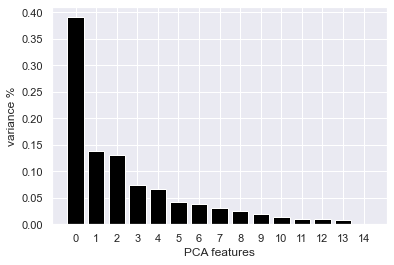

In [8]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Our variance drop-off point is after 0.
0 is our silica variable.
Silica is the most important variable for igneous rocks.
This finding supports the data.

Text(0, 0.5, 'PCA 2')

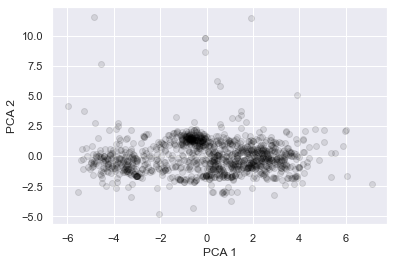

In [9]:
# Scatter plot of the first two components of the PCA model.
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Does not show clear clusters. There is a small dense region. However, nothing significant

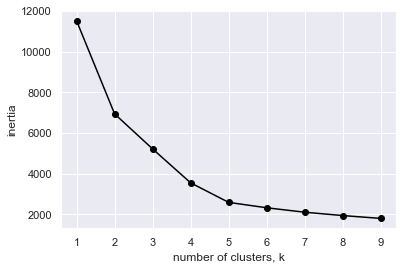

In [10]:
# Finding Clusters: Kmeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Our elbow point seens to be at 2 or at 4. I will be choosing 4 clusters moving forward. 

In [11]:
# Kmeans on our scaled data using 4 clusters

model= KMeans(n_clusters = 4)
model.fit(PCA_components)

KMeans(n_clusters=4)

In [12]:
# Labeling the clusters
model.labels_

array([1, 1, 2, ..., 2, 1, 2], dtype=int32)

In [13]:
# Cluster centers
model.cluster_centers_

array([[ 1.19153454e-01,  9.39740217e+00,  1.38890294e+01,
         1.29969395e+00, -8.02205815e-01,  1.79923352e-01,
         1.85167337e+00,  1.89104769e+00,  3.12858022e-02,
        -3.76048166e-02,  3.88368489e-02,  1.68908201e-01,
        -2.30386959e-01,  5.77518143e-02, -9.97473150e-07],
       [ 1.92839229e+00, -5.15414707e-01,  2.50764908e-01,
         3.44101669e-03,  8.99465156e-02, -6.21049319e-03,
        -1.72674089e-02,  2.90326775e-02,  3.60252422e-02,
         2.61465651e-02, -8.54257277e-03, -6.33828696e-03,
         1.73059248e-02, -2.30798729e-02,  1.98404764e-06],
       [-3.25014524e+00, -5.81366146e-01,  2.77116827e-01,
        -2.23217086e-01,  2.14612596e-01, -8.27844090e-02,
         7.19051270e-02,  1.32380058e-02, -2.17899011e-02,
         4.67470078e-02, -5.47511702e-02, -6.38586359e-03,
         1.76129723e-03, -1.02293978e-02, -1.76114819e-06],
       [-3.58748461e-01,  1.26789965e+00, -9.65408911e-01,
         1.77280083e-01, -3.42888903e-01,  8.46941807

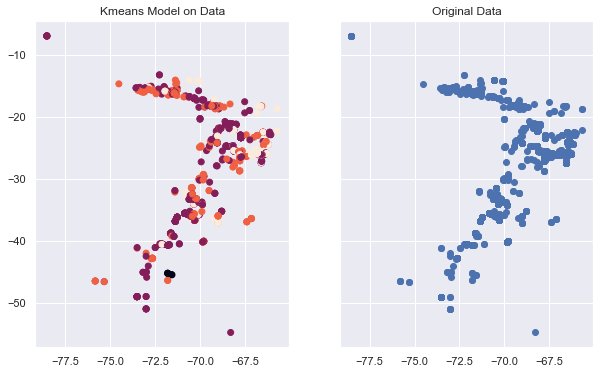

In [14]:
# Plotting our data using Kmeans to separate into 3 clusters 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Kmeans Model on Data')

ax1.scatter(all_data['LONGITUDE'],all_data['LATITUDE'],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(all_data['LONGITUDE'],all_data['LATITUDE'])

In [15]:
# Renaming the columns on PCA columns to match the clusterable variables
PCA_components.columns = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
PCA_components

SIO2      TIO2     AL2O3      FEOT       MNO       MGO       CAO  \
0     0.769144 -1.484597  0.451022  0.739399 -0.502232 -0.681667  0.270178   
1     3.867734 -1.657230 -0.245280  0.702751 -0.011931 -0.258931 -0.056014   
2    -0.961020 -2.170112  1.448483  1.707700 -0.012141 -0.607384  0.216976   
3     0.165924 -1.554391  1.283886  1.718358 -0.569419 -0.899010 -0.319129   
4     0.119928 -1.895485  1.209996  1.911498 -0.036365 -0.678910  0.024146   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -3.851093 -0.895780 -0.481037 -0.010700 -0.336909  0.091343  0.162590   
1157 -2.952477 -1.534920  0.543315 -1.144684  1.131907 -0.407523  0.097875   
1158 -3.537958 -0.614296 -0.093129  0.026660  0.183718 -0.192571  0.339053   
1159  1.345847 -0.810440  0.406297 -1.374792  0.173294  0.344807 -0.680854   
1160 -3.185100  0.148843  1.696401 -1.820170  0.643922  0.586404  1.301381   

          NA2O       K2O      P2O5        BA        RB        SR        TH  \
0     0.667859 -0.069168  0.071172  0.161118 -0.213834  0.419370  0.267532   
1     0.815882  0.111401 -0.032018  0.190746  0.217084  0.501815  0.331490   
2    -0.056387  0.369065  0.032168 -0.204717  0.439646 -0.006014  0.732183   
3    -0.116085 -0.040915  0.126263  0.126649  0.006407  0.080395 -0.177444   
4    -0.153757  0.149930 -0.117175 -0.106164  0.518532  0.051743  0.446342   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -0.375115 -0.318298 -0.291467 -0.294407 -0.149383 -0.013045 -0.034100   
1157 -0.429937 -0.590361 -0.611613 -0.567292 -0.066562 -0.187274 -0.526629   
1158 -0.257406 -0.047952  0.171460 -0.035685 -0.082620 -0.007336 -0.226414   
1159 -0.018070  0.462551 -0.397239  0.540074  0.449480  0.586328  0.190608   
1160 -1.791675 -1.468497 -1.325009 -0.516567  0.633706 -0.493968  0.025524   

            ZR  
0     0.000194  
1    -0.000015  
2     0.000008  
3     0.000015  
4     0.000006  
...        ...  
1156 -0.000182  
1157 -0.000009  
1158 -0.000190  
1159 -0.000031  
1160 -0.000018  

[1161 rows x 15 columns]

In [16]:
# Kmeans: predict a target cluster 

kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(PCA_components) # Compute k-means clustering.

PCA_components['Kmeans_cluster'] = kmeans.fit_predict(PCA_components)# Labels of each point
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = PCA_components['Kmeans_cluster'] # Labels of each point
PCA_components.head()

SIO2      TIO2     AL2O3      FEOT       MNO       MGO       CAO  \
0  0.769144 -1.484597  0.451022  0.739399 -0.502232 -0.681667  0.270178   
1  3.867734 -1.657230 -0.245280  0.702751 -0.011931 -0.258931 -0.056014   
2 -0.961020 -2.170112  1.448483  1.707700 -0.012141 -0.607384  0.216976   
3  0.165924 -1.554391  1.283886  1.718358 -0.569419 -0.899010 -0.319129   
4  0.119928 -1.895485  1.209996  1.911498 -0.036365 -0.678910  0.024146   

       NA2O       K2O      P2O5        BA        RB        SR        TH  \
0  0.667859 -0.069168  0.071172  0.161118 -0.213834  0.419370  0.267532   
1  0.815882  0.111401 -0.032018  0.190746  0.217084  0.501815  0.331490   
2 -0.056387  0.369065  0.032168 -0.204717  0.439646 -0.006014  0.732183   
3 -0.116085 -0.040915  0.126263  0.126649  0.006407  0.080395 -0.177444   
4 -0.153757  0.149930 -0.117175 -0.106164  0.518532  0.051743  0.446342   

         ZR  Kmeans_cluster  
0  0.000194               0  
1 -0.000015               0  
2  0.000008               1  
3  0.000015               0  
4  0.000006               0

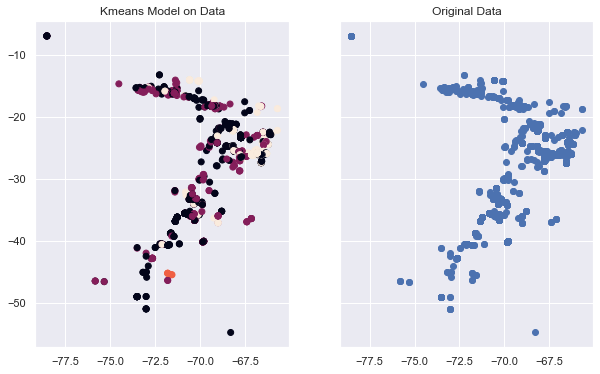

In [17]:
# Plotting our data using Kmeans to separate into 4 clusters w/target ( 'Kmeans_cluster')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Kmeans Model on Data')

ax1.scatter(all_data['LONGITUDE'],all_data['LATITUDE'],c=labels)

ax2.set_title('Original Data')

ax2.scatter(all_data['LONGITUDE'],all_data['LATITUDE'])

In [18]:
centers = kmeans.cluster_centers_
print(centers)

[[ 1.94146131e+00 -5.11697716e-01  2.45285440e-01 -5.56330889e-04
   8.92246040e-02 -4.86761122e-03 -1.59494174e-02  3.10697244e-02
   3.34169866e-02  2.91217394e-02 -9.99702301e-03 -7.61156216e-03
   1.84672167e-02 -2.37715047e-02  1.60938751e-06]
 [-3.23086874e+00 -6.01978291e-01  2.90434908e-01 -2.16974877e-01
   2.09867548e-01 -9.84991751e-02  7.69260260e-02 -8.42812016e-04
  -2.26064096e-02  4.72674281e-02 -4.93769674e-02 -1.49873713e-02
   1.39854444e-03  1.45830236e-05 -3.67688296e-07]
 [ 1.19153454e-01  9.39740217e+00  1.38890294e+01  1.29969395e+00
  -8.02205815e-01  1.79923352e-01  1.85167337e+00  1.89104769e+00
   3.12858022e-02 -3.76048166e-02  3.88368489e-02  1.68908201e-01
  -2.30386959e-01  5.77518143e-02 -9.97473150e-07]
 [-3.68411803e-01  1.26950437e+00 -9.60643620e-01  1.78031073e-01
  -3.34869254e-01  9.66454016e-02 -7.91270937e-02 -8.91888300e-02
  -3.75972331e-02 -9.38200602e-02  6.25485775e-02  2.39408733e-02
  -2.89810136e-02  4.01658076e-02 -2.43370622e-06]]


In [19]:
# Kmeans 2D
fig = px.scatter(PCA_components, x=all_data['LONGITUDE'], y=all_data['LATITUDE'], color=PCA_components['Kmeans_cluster'])
fig.show()

In [20]:
# Kmeans in 3D


total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    PCA_components, x=all_data['LATITUDE'], y=all_data['LONGITUDE'], z=PCA_components['Kmeans_cluster'], color=PCA_components['Kmeans_cluster'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'Latitude', '1': 'Longitude', '2': 'cluster'})
fig.show()

In [21]:
# SVM Model

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn import svm
from sklearn.mixture import GaussianMixture

In [23]:
X_SVM= PCA_components.drop(columns = ['Kmeans_cluster'])
y_SVM = PCA_components['Kmeans_cluster']


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

def get_silhouette_score(X, k):
    model = KMeans(k, random_state=42)
    model.fit(X)
    labels = model.predict(X)
    score = silhouette_score(X, labels)
    return score

def get_gmm_score(X, k):
    gmm = GaussianMixture(n_components=k, max_iter=42)
    gmm.fit(X)
    gmm_scores = gmm.score_samples(X)
    score = np.exp(gmm_scores).sum()
    return score

def get_scores(X, k):
    return k, get_silhouette_score(X, k), get_gmm_score(X, k)

X = PCA_components.values.reshape(-1, 1)

score_df = pd.DataFrame([get_scores(X, k) for k in range(2, 15, 1)], columns=['k', 'sil', 'gmm'])

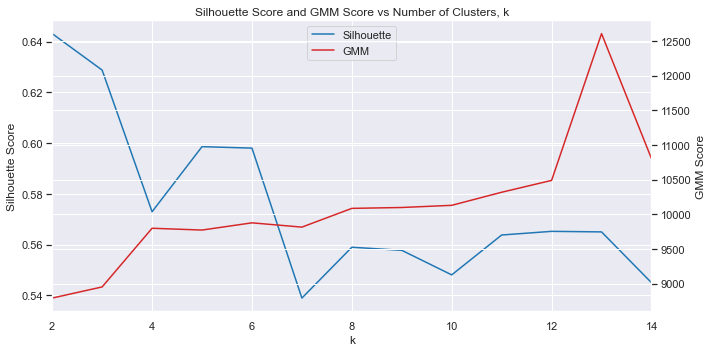

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 5))

k_min = np.min(score_df['k'])
k_max = np.max(score_df['k'])

line1 = ax1.plot(score_df['k'], score_df['sil'], color='tab:blue', label='Silhouette')
ax2 = ax1.twinx()
line2 = ax2.plot(score_df['k'], score_df['gmm'], color='tab:red', label='GMM')

lines = line1 + line2
labels = [l.get_label() for l in lines]

ax1.set_title('Silhouette Score and GMM Score vs Number of Clusters, k')
ax1.legend(lines, labels, loc=9)
ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Score')
ax1.set_xlim([k_min, k_max])
ax2.set_ylabel('GMM Score')

fig.tight_layout()

In [33]:
# Best K score
best_k = int(score_df.sort_values(['sil'], ascending=False).iloc[0]['k'])
print('best k = {}'.format(best_k))

best k = 3


We have determinded that k = 3 is the best clustering of the data. Below we will use k=3 to train a GMM model 

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

def get_silhouette_score(X, k):
    model = KMeans(k, random_state=42)
    model.fit(X)
    labels = model.predict(X)
    score = silhouette_score(X, labels)
    return score

def get_gmm_score(X, k):
    gmm = GaussianMixture(n_components=k, max_iter=42)
    gmm.fit(X)
    gmm_scores = gmm.score_samples(X)
    score = np.exp(gmm_scores).sum()
    return score

def get_scores(X, k):
    return k, get_silhouette_score(X, k), get_gmm_score(X, k)

X = PCA_components['SIO2'].values.reshape(-1, 1)

score_df = pd.DataFrame([get_scores(X, k) for k in range(2, 15, 1)], columns=['k', 'sil', 'gmm'])

In [28]:
def get_kmeans_labels(X, k):
    model = KMeans(k, random_state=37)
    model.fit(X)
    labels = model.predict(X)
    labels = np.array([0 if label == 1 else 1 for label in labels])
    return labels, model

def get_gmm_labels(X, k):
    gmm = GaussianMixture(n_components=k, max_iter=50, random_state=37)
    gmm.fit(X)
    labels = gmm.predict(X)
    labels = np.array([0 if label == 1 else 1 for label in labels])
    return labels, gmm

prediction_df = PCA_components.drop(columns = ['Kmeans_cluster'])

In [29]:
# Best K score
best_k = int(score_df.sort_values(['sil'], ascending=False).iloc[0]['k'])
print('best k = {}'.format(best_k))

best k = 3


In [30]:
PCA_components

SIO2      TIO2     AL2O3      FEOT       MNO       MGO       CAO  \
0     0.769144 -1.484597  0.451022  0.739399 -0.502232 -0.681667  0.270178   
1     3.867734 -1.657230 -0.245280  0.702751 -0.011931 -0.258931 -0.056014   
2    -0.961020 -2.170112  1.448483  1.707700 -0.012141 -0.607384  0.216976   
3     0.165924 -1.554391  1.283886  1.718358 -0.569419 -0.899010 -0.319129   
4     0.119928 -1.895485  1.209996  1.911498 -0.036365 -0.678910  0.024146   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -3.851093 -0.895780 -0.481037 -0.010700 -0.336909  0.091343  0.162590   
1157 -2.952477 -1.534920  0.543315 -1.144684  1.131907 -0.407523  0.097875   
1158 -3.537958 -0.614296 -0.093129  0.026660  0.183718 -0.192571  0.339053   
1159  1.345847 -0.810440  0.406297 -1.374792  0.173294  0.344807 -0.680854   
1160 -3.185100  0.148843  1.696401 -1.820170  0.643922  0.586404  1.301381   

          NA2O       K2O      P2O5        BA        RB        SR        TH  \
0     0.667859 -0.069168  0.071172  0.161118 -0.213834  0.419370  0.267532   
1     0.815882  0.111401 -0.032018  0.190746  0.217084  0.501815  0.331490   
2    -0.056387  0.369065  0.032168 -0.204717  0.439646 -0.006014  0.732183   
3    -0.116085 -0.040915  0.126263  0.126649  0.006407  0.080395 -0.177444   
4    -0.153757  0.149930 -0.117175 -0.106164  0.518532  0.051743  0.446342   
...        ...       ...       ...       ...       ...       ...       ...   
1156 -0.375115 -0.318298 -0.291467 -0.294407 -0.149383 -0.013045 -0.034100   
1157 -0.429937 -0.590361 -0.611613 -0.567292 -0.066562 -0.187274 -0.526629   
1158 -0.257406 -0.047952  0.171460 -0.035685 -0.082620 -0.007336 -0.226414   
1159 -0.018070  0.462551 -0.397239  0.540074  0.449480  0.586328  0.190608   
1160 -1.791675 -1.468497 -1.325009 -0.516567  0.633706 -0.493968  0.025524   

            ZR  Kmeans_cluster  
0     0.000194               0  
1    -0.000015               0  
2     0.000008               1  
3     0.000015               0  
4     0.000006               0  
...        ...             ...  
1156 -0.000182               1  
1157 -0.000009               1  
1158 -0.000190               1  
1159 -0.000031               0  
1160 -0.000018               1  

[1161 rows x 16 columns]

In [53]:
cluster_variables

['SIO2',
 'TIO2',
 'AL2O3',
 'FEOT',
 'MNO',
 'MGO',
 'CAO',
 'NA2O',
 'K2O',
 'P2O5',
 'BA',
 'RB',
 'SR',
 'TH',
 'ZR']

IndexError: list index out of range

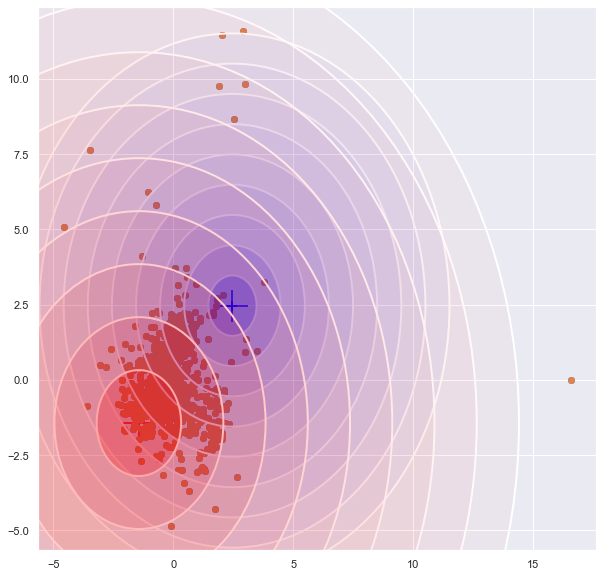

In [73]:
# GMM Results Visualized

from matplotlib.patches import Ellipse
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10, 10))
colorset = ['blue', 'red']

pcs = []

for cluster, label in zip(range(best_k), cluster_variables):#['SIO2', 'TIO2','AL2O3','FEOT','MNO','MGO','CAO',
                                         # 'NA2O','K2O','P2O5','BA','RB','SR','TH','ZR']):
    cluster_df = prediction_df[prediction_df['gmm_label'] == cluster]
    mu = cluster_df.mean().loc['SIO2']
    cov = cluster_df.var().loc['SIO2']
    cov = np.array([[cov]])
    
    eva, eve = np.linalg.eigh(cov)
    order = eva.argsort()[::-1]
    eva, eve = eva[order], eve[:, order]
    vx, vy = eve[:,0][0], eve[:,0][0]
    theta = np.arctan2(vy, vx)
    
    color = colors.to_rgba(colorset[cluster])
   # print('cluster={}, color={}'.format(cluster, color))

    for cov_factor in range(1, 10):
        size = np.sqrt(eva[0]) * cov_factor * 2
        angle = np.degrees(theta)
        ell = Ellipse(
            xy=(mu, mu),
            width=size,
            height=size,
            angle=angle,
            linewidth=2)
        ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
        ax.add_artist(ell)

    #c = [colorset[v] for v in cluster_df['TIO2'].values]
    pc = ax.scatter(mu, mu, marker='+', s=100, c=colorset[cluster])
    ax.scatter(mu, mu, marker='+', s=1000, c=colorset[cluster])
    ax.scatter(PCA_components['FEOT'], PCA_components['TIO2'], label=label, marker='o')
    #ax.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'], label=label, marker='o')
    pcs.append(pc)

ax.set_title('Clustering and GMM Results')
ax.set_xlabel('FEOT')
ax.set_ylabel('TIO2')
ax.legend(pcs, ['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5','BA','RB','SR','TH','ZR'])


IndexError: list index out of range

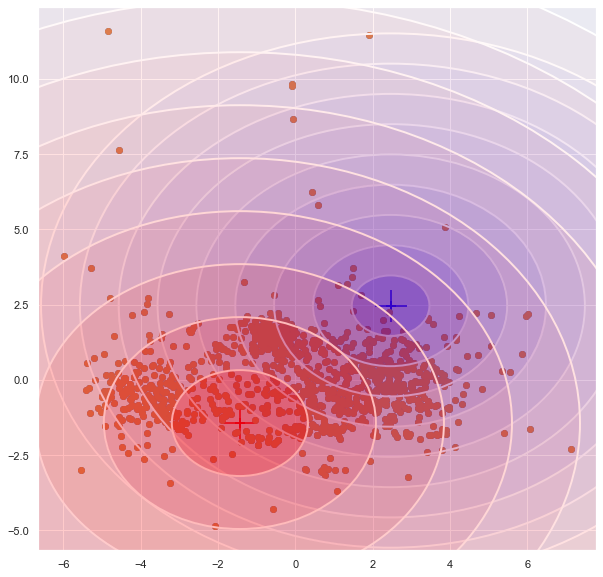

In [74]:
# GMM Results Visualized

from matplotlib.patches import Ellipse
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10, 10))
colorset = ['blue', 'red']

pcs = []

for cluster, label in zip(range(best_k), cluster_variables):#['SIO2', 'TIO2','AL2O3','FEOT','MNO','MGO','CAO',
                                         # 'NA2O','K2O','P2O5','BA','RB','SR','TH','ZR']):
    cluster_df = prediction_df[prediction_df['gmm_label'] == cluster]
    mu = cluster_df.mean().loc['SIO2']
    cov = cluster_df.var().loc['SIO2']
    cov = np.array([[cov]])
    
    eva, eve = np.linalg.eigh(cov)
    order = eva.argsort()[::-1]
    eva, eve = eva[order], eve[:, order]
    vx, vy = eve[:,0][0], eve[:,0][0]
    theta = np.arctan2(vy, vx)
    
    color = colors.to_rgba(colorset[cluster])
   # print('cluster={}, color={}'.format(cluster, color))

    for cov_factor in range(1, 10):
        size = np.sqrt(eva[0]) * cov_factor * 2
        angle = np.degrees(theta)
        ell = Ellipse(
            xy=(mu, mu),
            width=size,
            height=size,
            angle=angle,
            linewidth=2)
        ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
        ax.add_artist(ell)

    #c = [colorset[v] for v in cluster_df['TIO2'].values]
    pc = ax.scatter(mu, mu, marker='+', s=100, c=colorset[cluster])
    ax.scatter(mu, mu, marker='+', s=1000, c=colorset[cluster])
    ax.scatter(PCA_components['SIO2'], PCA_components['TIO2'], label=label, marker='o')
    #ax.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'], label=label, marker='o')
    pcs.append(pc)

ax.set_title('Clustering and GMM Results')
ax.set_xlabel('SIO2')
ax.set_ylabel('TIO2')
ax.legend(pcs, ['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5','BA','RB','SR','TH','ZR'])


IndexError: list index out of range

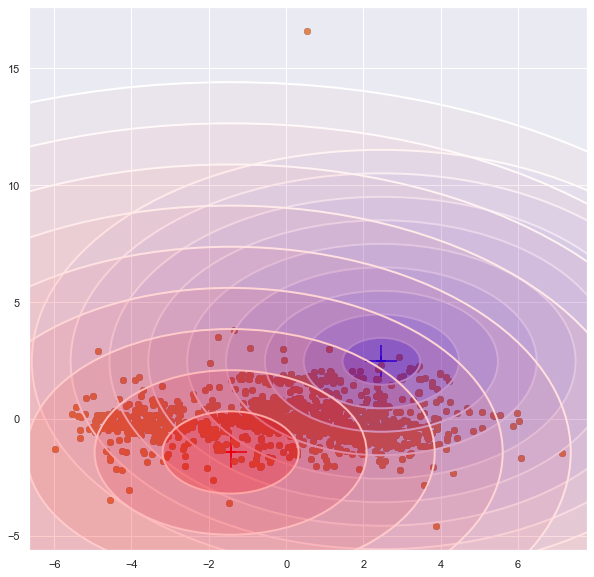

In [75]:
# GMM Results Visualized

from matplotlib.patches import Ellipse
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10, 10))
colorset = ['blue', 'red']

pcs = []

for cluster, label in zip(range(best_k), cluster_variables):#['SIO2', 'TIO2','AL2O3','FEOT','MNO','MGO','CAO',
                                         # 'NA2O','K2O','P2O5','BA','RB','SR','TH','ZR']):
    cluster_df = prediction_df[prediction_df['gmm_label'] == cluster]
    mu = cluster_df.mean().loc['SIO2']
    cov = cluster_df.var().loc['SIO2']
    cov = np.array([[cov]])
    
    eva, eve = np.linalg.eigh(cov)
    order = eva.argsort()[::-1]
    eva, eve = eva[order], eve[:, order]
    vx, vy = eve[:,0][0], eve[:,0][0]
    theta = np.arctan2(vy, vx)
    
    color = colors.to_rgba(colorset[cluster])
   # print('cluster={}, color={}'.format(cluster, color))

    for cov_factor in range(1, 10):
        size = np.sqrt(eva[0]) * cov_factor * 2
        angle = np.degrees(theta)
        ell = Ellipse(
            xy=(mu, mu),
            width=size,
            height=size,
            angle=angle,
            linewidth=2)
        ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
        ax.add_artist(ell)

    #c = [colorset[v] for v in cluster_df['TIO2'].values]
    pc = ax.scatter(mu, mu, marker='+', s=100, c=colorset[cluster])
    ax.scatter(mu, mu, marker='+', s=1000, c=colorset[cluster])
    ax.scatter(PCA_components['SIO2'], PCA_components['FEOT'], label=label, marker='o')
    #ax.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'], label=label, marker='o')
    pcs.append(pc)

ax.set_title('Clustering and GMM Results')
ax.set_xlabel('SIO2')
ax.set_ylabel('FEOT')
ax.legend(pcs, ['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5','BA','RB','SR','TH','ZR'])


IndexError: list index out of range

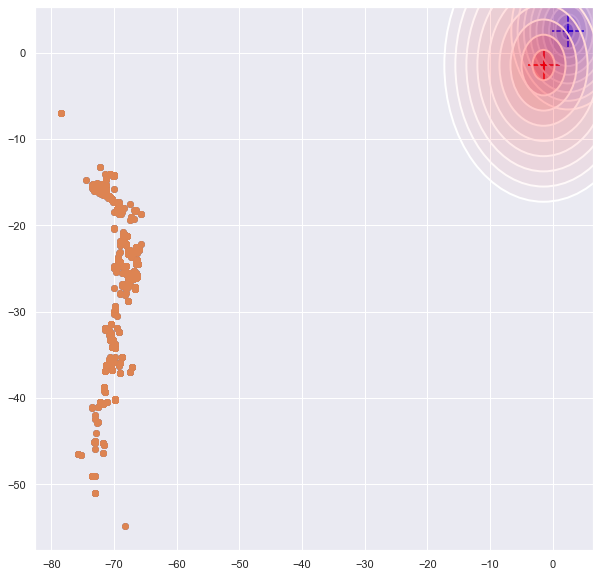

In [70]:
# GMM Results Visualized

from matplotlib.patches import Ellipse
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10, 10))
colorset = ['blue', 'red']

pcs = []

for cluster, label in zip(range(best_k), cluster_variables):#['SIO2', 'TIO2','AL2O3','FEOT','MNO','MGO','CAO',
                                         # 'NA2O','K2O','P2O5','BA','RB','SR','TH','ZR']):
    cluster_df = prediction_df[prediction_df['gmm_label'] == cluster]
    mu = cluster_df.mean().loc['SIO2']
    cov = cluster_df.var().loc['SIO2']
    cov = np.array([[cov]])
    
    eva, eve = np.linalg.eigh(cov)
    order = eva.argsort()[::-1]
    eva, eve = eva[order], eve[:, order]
    vx, vy = eve[:,0][0], eve[:,0][0]
    theta = np.arctan2(vy, vx)
    
    color = colors.to_rgba(colorset[cluster])
   # print('cluster={}, color={}'.format(cluster, color))

    for cov_factor in range(1, 10):
        size = np.sqrt(eva[0]) * cov_factor * 2
        angle = np.degrees(theta)
        ell = Ellipse(
            xy=(mu, mu),
            width=size,
            height=size,
            angle=angle,
            linewidth=2)
        ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
        ax.add_artist(ell)

    #c = [colorset[v] for v in cluster_df['TIO2'].values]
    pc = ax.scatter(mu, mu, marker='+', s=100, c=colorset[cluster])
    ax.scatter(mu, mu, marker='+', s=1000, c=colorset[cluster])
    ax.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'], label=label, marker='o')
    pcs.append(pc)

ax.set_title('Clustering and GMM Results')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(pcs, ['SIO2','TIO2','AL2O3','FEOT','MNO','MGO','CAO','NA2O','K2O','P2O5','BA','RB','SR','TH','ZR'])


In [35]:
X_SVM = scaled_data.drop(columns = ['LONGITUDE','LATITUDE'])
y_SVM = PCA_components['Kmeans_cluster']
X_SVM

SIO2      TIO2     AL2O3      FEOT       MNO       MGO       CAO  \
0    -0.024141  0.168978 -0.521327  0.747423  0.083799 -0.078924  0.565343   
1    -1.403648  1.162498  0.884947  1.953749  0.657788  0.763759  1.722270   
2     0.415834 -0.798736 -1.130687  1.036321  0.930433 -1.165864 -0.723119   
3     0.198186  0.697995 -0.943133  0.822114  0.499941 -0.720775 -0.444788   
4     0.030764  0.022746 -0.858159  1.385818  1.073930 -0.947391 -0.401912   
...        ...       ...       ...       ...       ...       ...       ...   
1156  1.552826 -1.379364 -1.506561 -1.408743 -0.346692 -1.335486 -1.361172   
1157  1.367431 -1.082599 -1.457567 -1.255839 -0.059698 -0.937892 -1.226730   
1158  1.476009 -1.151414 -1.441491 -1.255134 -0.045348 -1.069519 -1.246352   
1159 -0.618981  0.125969  1.342733  0.240795 -0.648037 -0.491446  0.784084   
1160  1.461729 -1.706237 -1.118439 -1.656068 -0.045348 -1.389766 -1.278327   

          NA2O       K2O      P2O5        BA        RB        SR        TH  \
0     0.570370 -1.318284 -0.077145 -0.303780 -0.730427 -0.631694 -0.650215   
1     0.732584 -1.879050  0.886037 -0.670253 -0.938211 -0.216935 -1.148261   
2     1.361160 -0.783045 -1.061731  0.165022 -0.793204 -0.839074 -0.684963   
3     1.374340 -0.930442 -0.205569  0.234033 -0.695944 -0.747348 -0.583037   
4     1.345952 -0.887623 -0.526630  0.034138 -0.757837 -0.603778 -0.624734   
...        ...       ...       ...       ...       ...       ...       ...   
1156  0.041150  0.773265 -1.265070 -0.908224 -0.050489 -0.763300  0.484866   
1157 -0.161617  0.877842 -1.489812 -0.391828 -0.984188  0.654856 -1.183009   
1158 -0.298484  0.712330 -1.372090 -0.094366 -0.050489 -0.803181  0.241634   
1159  0.251013 -0.447080  0.136896  0.210236 -0.802046  0.636511 -1.067184   
1160 -0.102814  1.077939 -1.607534  0.298285 -0.510265  3.097148  0.689876   

            ZR  
0     0.633613  
1     0.051968  
2     0.800753  
3     1.034748  
4     0.807438  
...        ...  
1156 -0.529677  
1157 -0.763673  
1158 -0.442765  
1159 -0.576476  
1160 -0.248883  

[1161 rows x 15 columns]

In [45]:
# split into input and output elements
X, y = X_SVM[:], y_SVM[:]
print(X.shape, y.shape)

(1161, 15) (1161,)


In [46]:
# create loocv procedure
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# create model
model = RandomForestClassifier(random_state=42)

In [48]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.968 (0.176)


The model is then evaluated using LOOCV and the estimated performance when making predictions on new data has an accuracy of about 97.3 percent

In [49]:
# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_SVM, y_SVM)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.40
|   |--- feature_8 <= -0.00
|   |   |--- feature_11 <= -0.10
|   |   |   |--- feature_0 <= 0.30
|   |   |   |   |--- feature_10 <= 6.87
|   |   |   |   |   |--- feature_7 <= -0.53
|   |   |   |   |   |   |--- feature_7 <= -0.55
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  -0.55
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_7 >  -0.53
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  6.87
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  0.30
|   |   |   |   |--- feature_9 <= -0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  -0.56
|   |   |   |   |   |--- class: 0
|   |   |--- feature_11 >  -0.10
|   |   |   |--- feature_0 <= -0.55
|   |   |   |   |--- feature_13 <= 1.43
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  1.43
|   |   |   |   |   |--- feature_3 <= 1.03
|   |   |   |   |   |   |--- class: 3
|   |   |   | 

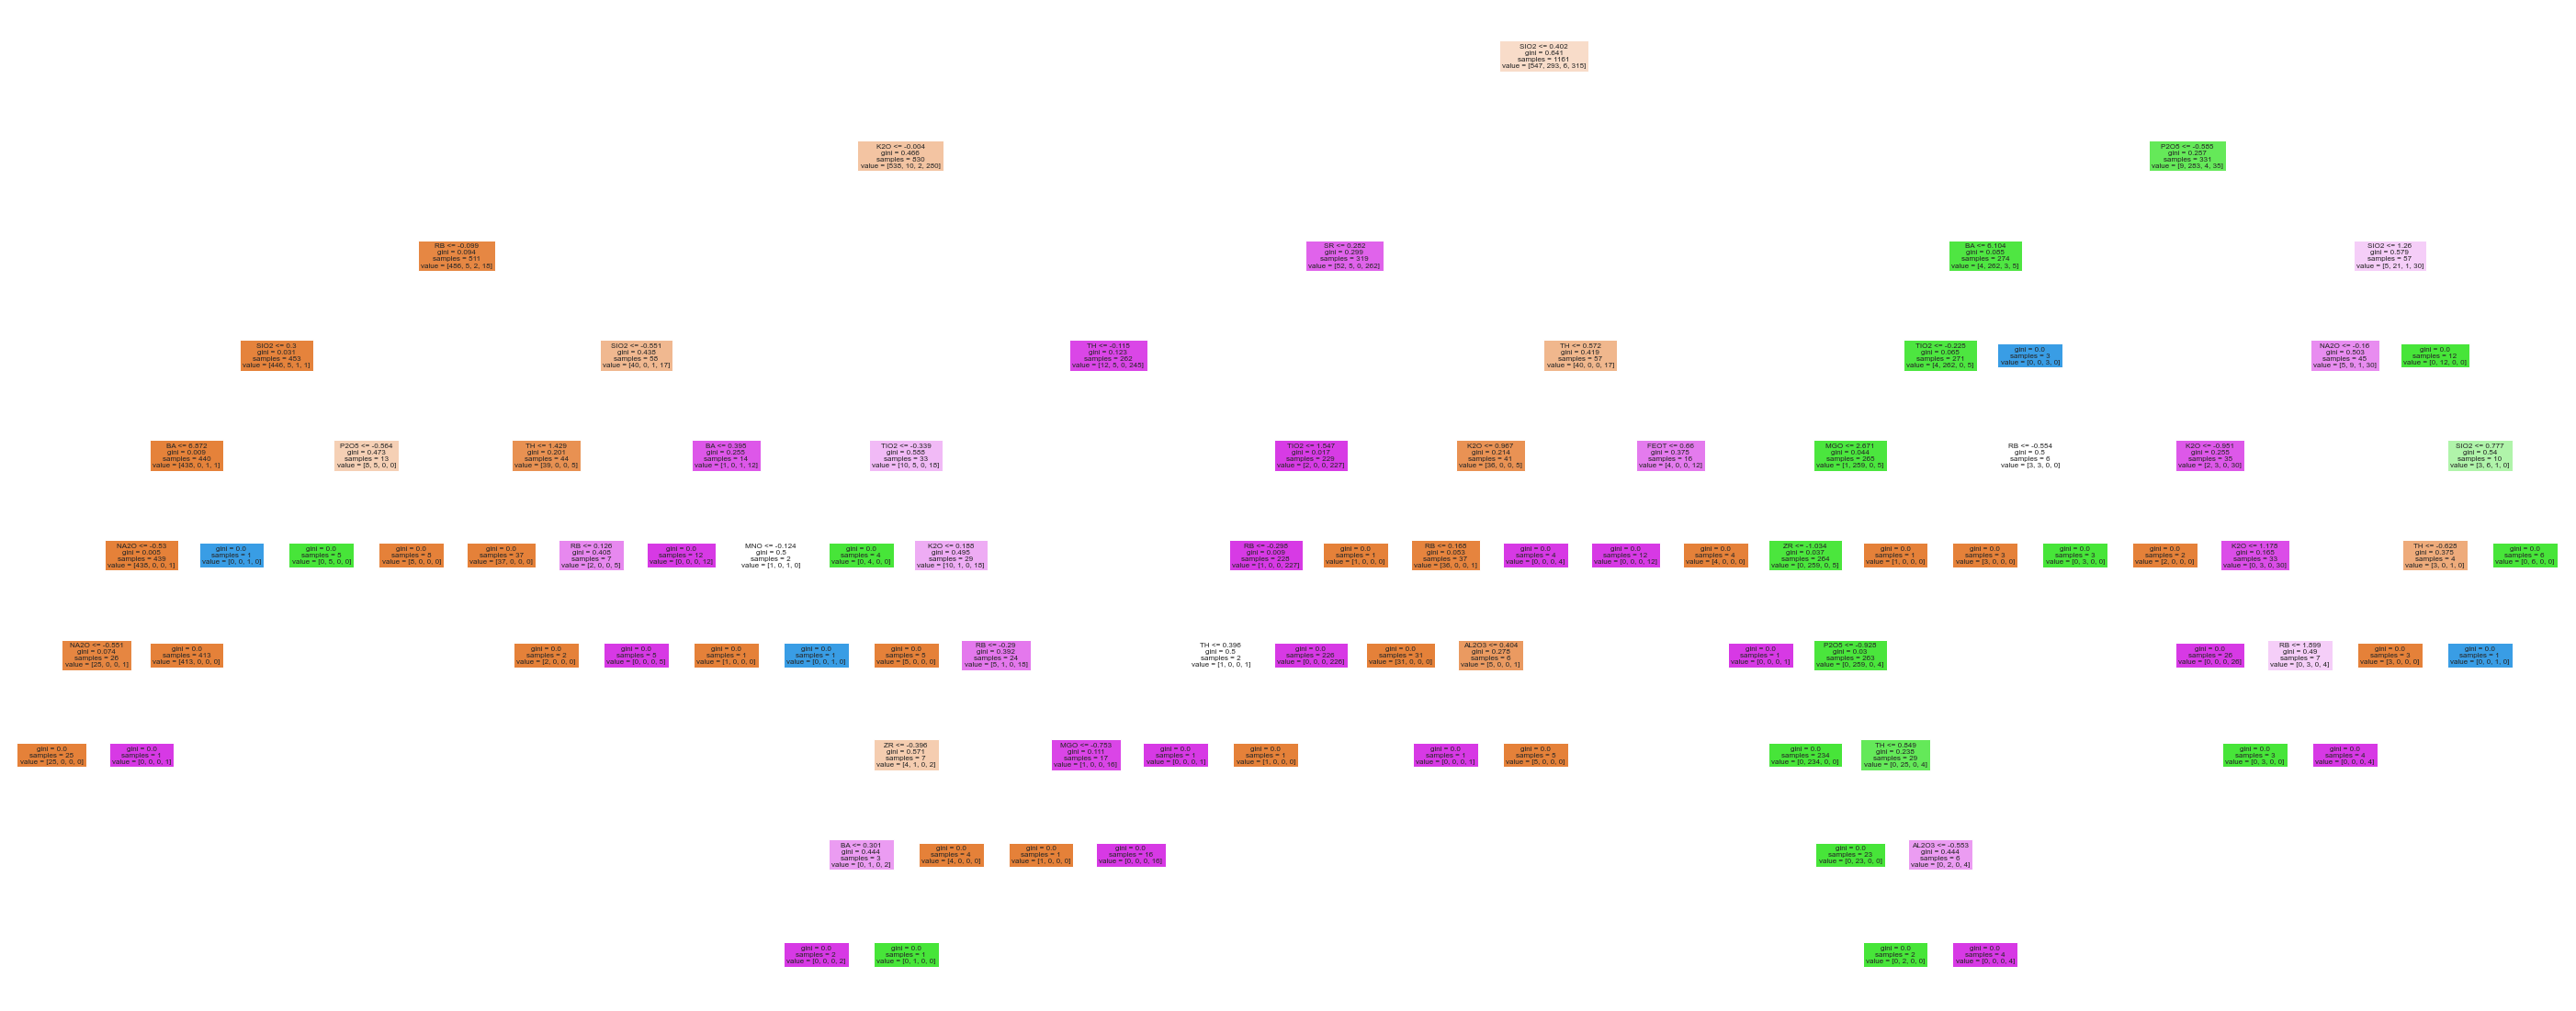

In [51]:
from sklearn import tree
fig = plt.figure(figsize=(50,20))
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_SVM, y_SVM)
_= tree.plot_tree(clf,
                  feature_names= cluster_variables,
                  filled=True)  


# Understanding more about the clusters

In [ ]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X[cluster_variables])
 
df.shape

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3, random_state = 42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)

score = silhouette_score(df, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

In [ ]:
# Initialise KMeans instance

kmeans = KMeans(n_clusters=3)

# Set the seed for reproducibility
numpy.random.seed(42)
# Run K-Means algorithm
k5cls = kmeans.fit(X[cluster_variables])

In [ ]:
k5cls.labels_

In [ ]:
# Spatial Distribution of Clusters

# Assign labels to a column
X['Kmeans'] = k5cls.labels_
X

In [ ]:
# Group data table by cluster label and count observations
k5sizes = X.groupby('Kmeans').size()

# Group table by cluster label, keep the variables used 
# for clustering, and obtain their descriptive summary
k5desc = X.groupby('Kmeans')[cluster_variables].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k5desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k5desc.T[cluster].unstack())
    Cluster_0 = pd.DataFrame(k5desc.T[0].unstack())
    Cluster_1 = pd.DataFrame(k5desc.T[1].unstack())
    Cluster_2 = pd.DataFrame(k5desc.T[2].unstack())

In [ ]:
Cluster_0

In [ ]:
Cluster_1

In [ ]:
Cluster_2

In [ ]:
# Index db on cluster ID
tidy_db = X.set_index('Kmeans')
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

In [ ]:
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='Kmeans', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()

In [ ]:
s = plt.scatter(coordinates['LONGITUDE'], coordinates['LATITUDE'],c = X['Kmeans'])
plt.legend(*s.legend_elements())
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.show()